# Introduction

In this project, we embarked on an educational journey to explore and visualize several sorting algorithms, necesserily the bubble sort, quick sort, counting sort and radix sort. Sorting is a key operation in computer science, often serving as a cornerstone for understanding algorithmic efficiency. Our goal was to not only implement these algorithms but to also bring them to life through visualizations, allowing for an intuitive understanding of their mechanics and efficiency.



In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import random


# Bubble Sort

Bubble Sort is a simple comparison-based sorting algorithm. It repeatedly steps through the list, compares adjacent elements, and swaps them if they are in the wrong order. The pass through the list is repeated until the list is sorted.

#### Time Complexity:

Best Case: O(n) - when the array is already sorted.
Average and Worst Case: O(n²) - when the array is sorted in reverse order or not partially sorted at all.


In [3]:
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
                yield arr

y
arr_bs = np.random.randint(1, 100, 20)
generator_bs = bubble_sort(arr_bs.copy())


### Visualization Choice:

The chosen visualization for Bubble Sort shows the swapping of adjacent elements. This method is intuitive for Bubble Sort because the algorithm's primary operation is the pairwise swapping of elements, making it easy to observe the sorting process in action.

<IPython.core.display.Javascript object>


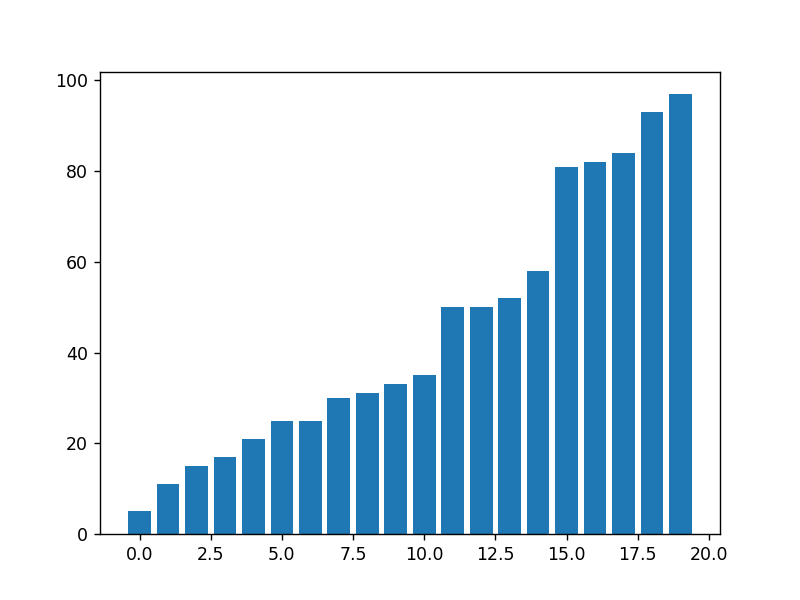

C:\Windows\Temp\ipykernel_19912\3146624380.py:8: UserWarning: frames=<generator object bubble_sort at 0x0000023B5E6F2540> which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = FuncAnimation(fig, animate, frames=generator_bs, repeat=False)


In [4]:
fig, ax = plt.subplots()
bars = ax.bar(range(len(arr_bs)), next(generator_bs))

def animate(A):
    for bar, val in zip(bars, A):
        bar.set_height(val)

ani = FuncAnimation(fig, animate, frames=generator_bs, repeat=False)
plt.show()


# 2. QuickSort
Description:
QuickSort is a divide-and-conquer algorithm. It works by selecting a 'pivot' element from the array and partitioning the other elements into two sub-arrays, according to whether they are less than or greater than the pivot. The sub-arrays are then sorted recursively.

#### Time Complexity:

Best and Average Case: O(n log n)
Worst Case: O(n²) - typically occurs when the smallest or largest element is always chosen as the pivot.


In [5]:
def quicksort(arr, start, end):
    if start >= end:
        return

    pivot_index = partition(arr, start, end)
    yield arr
    yield from quicksort(arr, start, pivot_index)
    yield from quicksort(arr, pivot_index + 1, end)

def partition(arr, start, end):
    pivot = arr[start]
    low = start + 1
    high = end

    while True:
        while low <= high and arr[high] >= pivot:
            high = high - 1

        while low <= high and arr[low] <= pivot:
            low = low + 1

        if low <= high:
            arr[low], arr[high] = arr[high], arr[low]
        else:
            break

    arr[start], arr[high] = arr[high], arr[start]
    return high

arr_qs = np.random.randint(1, 100, 20)
generator_qs = quicksort(arr_qs.copy(), 0, len(arr_qs) - 1)



### Visualization Choice:
The visualization of QuickSort focuses on the partitioning process and the recursive sorting of sub-arrays. This method effectively demonstrates the divide-and-conquer nature of the algorithm, highlighting how larger problems are broken down into smaller ones.

<IPython.core.display.Javascript object>


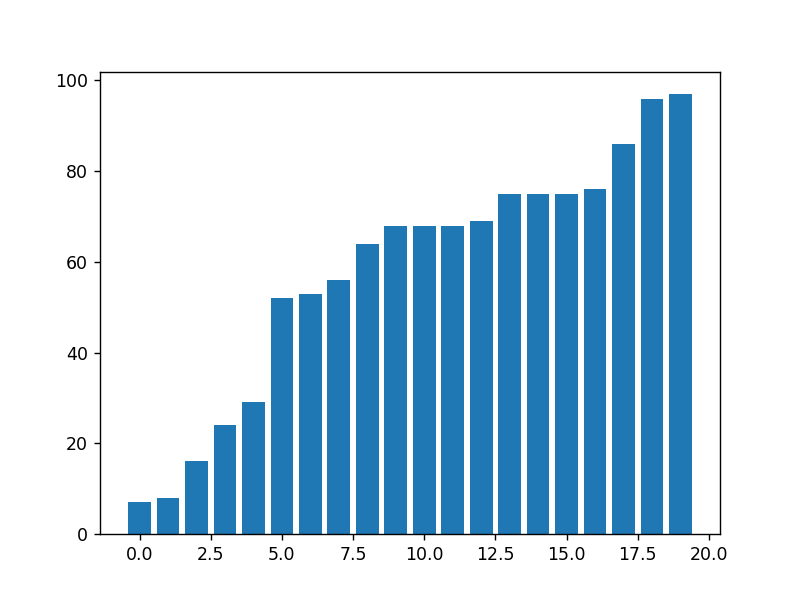

C:\Windows\Temp\ipykernel_19912\1613352719.py:8: UserWarning: frames=<generator object quicksort at 0x0000023B5E7889A0> which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani_qs = FuncAnimation(fig_qs, animate_qs, frames=generator_qs, repeat=False)


In [6]:
fig_qs, ax_qs = plt.subplots()
bars_qs = ax_qs.bar(range(len(arr_qs)), next(generator_qs))

def animate_qs(A):
    for bar, val in zip(bars_qs, A):
        bar.set_height(val)

ani_qs = FuncAnimation(fig_qs, animate_qs, frames=generator_qs, repeat=False)
plt.show()


# 3. Counting Sort
Description:
Counting Sort is a non-comparison sorting algorithm. It operates by counting the number of objects that have each distinct key value and using arithmetic to determine the positions of each key value in the output sequence. It works best when the range of potential items in the input is not significantly greater than the number of items.

#### Time Complexity:

All Cases: O(n+k) - where n is the number of elements
in the array and k is the range of the input.



In [19]:
def counting_sort_vis(arr):
    max_value = max(arr)
    m = max_value + 1
    count = [0] * m

    
    for a in arr:
        count[a] += 1
        yield (count.copy(), 'count')  # Yield count array with a label

    
    i = 0
    for a in range(m):
        for _ in range(count[a]):
            arr[i] = a
            i += 1
            yield (arr.copy(), 'sort')  # Yield sorted array with a label


arr_cs = np.random.randint(1, 100, 20)
generator_cs = counting_sort_vis(arr_cs.copy())

### Visualization Choice:
For Counting Sort, the visualization is split into two parts: first showing the process of counting each element (how many times each value appears), and then the actual sorting process based on these counts. This approach is chosen because Counting Sort works in two distinct phases: counting and then placing the elements in order, which is different from the element-by-element comparison or swapping in other sorts.

<IPython.core.display.Javascript object>


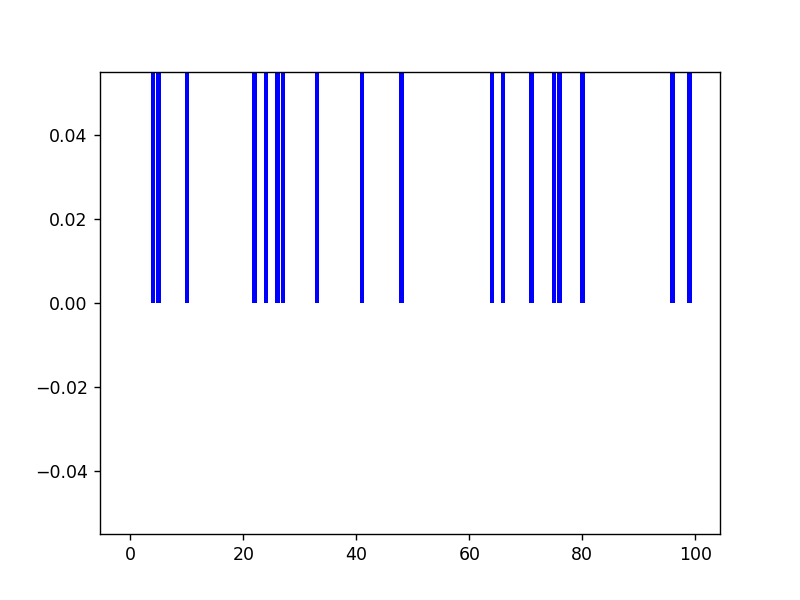

<IPython.core.display.Javascript object>


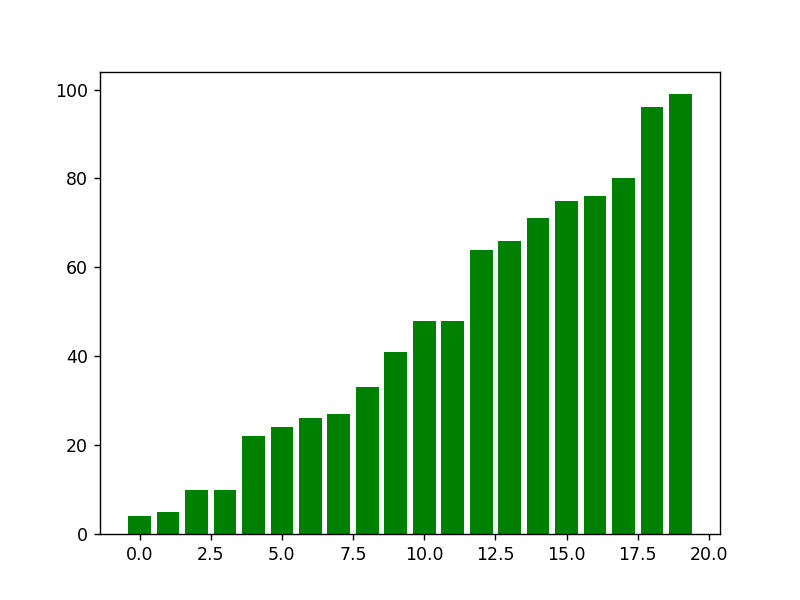

C:\Windows\Temp\ipykernel_19912\4130054730.py:31: UserWarning: frames=<generator object counting_sort_vis at 0x0000023B5CA46350> which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani_cs = FuncAnimation(fig_count, animate_cs, frames=generator_cs, repeat=False)


In [18]:

fig_count, ax_count = plt.subplots()
fig_sort, ax_sort = plt.subplots()

bars_count = ax_count.bar(range(max(arr_cs)+1), [0]*(max(arr_cs)+1), color='blue')
bars_sort = ax_sort.bar(range(len(arr_cs)), arr_cs, color='green')

def update_count(count_arr):
    for bar, val in zip(bars_count, count_arr):
        bar.set_height(val)

def update_sort(sorted_arr):
    for bar, val in zip(bars_sort, sorted_arr):
        bar.set_height(val)

def animate_cs(data):
    arr,phase = data
    if phase == 'count':
        update_count(arr)
    elif phase == 'sort':
        update_sort(arr)

ani_cs = FuncAnimation(fig_count, animate_cs, frames=generator_cs, repeat=False)
plt.show()


# 4. Radix Sort
Description:
Radix Sort is a non-comparative integer sorting algorithm. It sorts data with integer keys by grouping the keys by individual digits that share the same significant position and value (a digit's place). Radix sort uses Counting Sort as a subroutine to sort an array of numbers. It processes the numbers digit by digit, starting from the least significant digit to the most significant digit.

#### Time Complexity:
All Cases: O(nk) - where n is the number of elements in the array, and k is the number of digits in the largest number.


In [24]:
def counting_sort_for_radix_vis(arr, exp1):
    n = len(arr)
    output = [0] * n
    count = [0] * 10

    for i in range(n):
        index = arr[i] // exp1
        count[(index) % 10] += 1

    for i in range(1, 10):
        count[i] += count[i - 1]

    i = n - 1
    while i >= 0:
        index = arr[i] // exp1
        output[count[(index) % 10] - 1] = arr[i]
        count[(index) % 10] -= 1
        i -= 1

    for i in range(n):
        arr[i] = output[i]
    yield arr

def radix_sort_vis(arr):
    max1 = max(arr)
    exp = 1
    while max1 / exp > 1:
        yield from counting_sort_for_radix_vis(arr, exp)
        exp *= 10

arr_radix = np.random.randint(1, 1000, 20)
generator_radix = radix_sort_vis(arr_radix.copy())


### Visualization Choice:
The visualization for Radix Sort demonstrates the array's state after sorting each digit, starting from the least significant to the most significant. This method illustrates how Radix Sort gradually sorts the entire array by processing one digit at a time, utilizing Counting Sort for each pass.

<IPython.core.display.Javascript object>


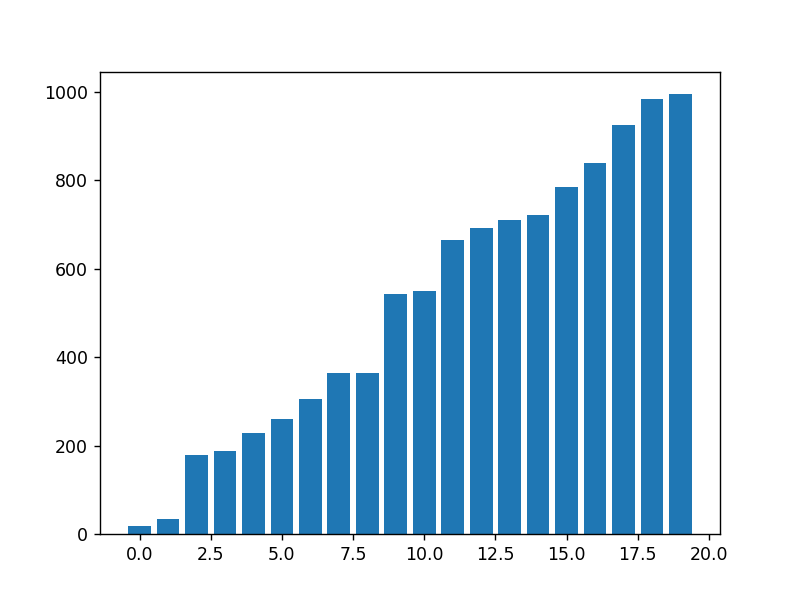

C:\Windows\Temp\ipykernel_19912\1923409433.py:10: UserWarning: frames=<generator object radix_sort_vis at 0x0000023B628973E0> which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani_radix = FuncAnimation(fig_radix, update_radix, frames=generator_radix, repeat=False)


In [25]:
fig_radix, ax_radix = plt.subplots()
bars_radix = ax_radix.bar(range(len(arr_radix)), arr_radix)


def update_radix(arr):
    for bar, val in zip(bars_radix, arr):
        bar.set_height(val)

# Animation
ani_radix = FuncAnimation(fig_radix, update_radix, frames=generator_radix, repeat=False)
plt.show()


General Note on Visualization Choices
The visualization choices for each sorting algorithm were made to best reflect the fundamental operations and characteristics of these algorithms. For comparison-based algorithms like Bubble Sort and QuickSort, the focus is on comparing and swapping elements. For non-comparative algorithms like Counting Sort and Radix Sort, the emphasis is on how these algorithms organize and group data differently, either by counting occurrences or sorting by individual digits.